In [14]:
import os
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import torchvision.models as models
import torch.optim as optim
from sklearn.metrics import accuracy_score

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Used to change filepaths
from pathlib import Path
import matplotlib.pyplot as plt
import IPython
from IPython.display import display
from PIL import Image
%matplotlib inline
import os

In [15]:
fruit_dir = '/kaggle/input/datasat/Fruits_Vegetables_Dataset(12000)/Fruits'
veg_dir = '/kaggle/input/datasat/Fruits_Vegetables_Dataset(12000)/Vegetables'

In [16]:

fruit_classes = ['FreshApple', 'RottenApple', 'FreshBanana', 'RottenBanana', 'FreshMango', 'RottenMango', 'FreshOrange', 'RottenOrange', 'FreshStrawberry', 'RottenStrawberry']
veg_classes = ['FreshCarrot', 'RottenCarrot', 'FreshTomato', 'RottenTomato', 'FreshCucumber', 'RottenCucumber', 'FreshPotato', 'RottenPotato', 'FreshBellpepper', 'RottenBellpepper']



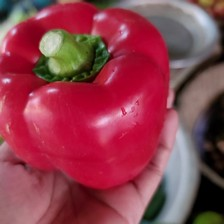

In [48]:
vege = ['/kaggle/input/datasat/Fruits_Vegetables_Dataset(12000)/Vegetables/FreshBellpepper/freshPepper (154).jpg','/kaggle/input/datasat/Fruits_Vegetables_Dataset(12000)/Vegetables/FreshBellpepper/freshPepper (482).jpg']
IPython.display.Image(filename=vege[0])
IPython.display.Image(filename=vege[1])

In [17]:

class CustomDataset(Dataset):
    def __init__(self, data_dir, classes, transform=None):
        self.data_dir = data_dir
        self.classes = classes
        self.transform = transform
        self.images = []
        self.labels = []

        for class_name in classes:
            class_path = os.path.join(data_dir, class_name)
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                img = Image.open(img_path).convert('RGB')
                self.images.append(img)
                self.labels.append(classes.index(class_name))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)

        return image, label

In [18]:

data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


In [19]:

fruit_dataset = CustomDataset(fruit_dir, fruit_classes, transform=data_transform)
veg_dataset = CustomDataset(veg_dir, veg_classes, transform=data_transform)


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [31]:
fruit_dataset[1]

(tensor([[[0.5412, 0.5412, 0.5412,  ..., 0.0706, 0.0824, 0.1059],
          [0.5137, 0.5451, 0.5333,  ..., 0.0588, 0.0706, 0.0824],
          [0.4118, 0.5412, 0.6588,  ..., 0.1216, 0.0627, 0.0588],
          ...,
          [0.1373, 0.1333, 0.1373,  ..., 0.9686, 0.9686, 0.9686],
          [0.2000, 0.1765, 0.1412,  ..., 0.9686, 0.9686, 0.9686],
          [0.3608, 0.3686, 0.3373,  ..., 0.9686, 0.9686, 0.9686]],
 
         [[0.5804, 0.5686, 0.5569,  ..., 0.0941, 0.1059, 0.1294],
          [0.5569, 0.5725, 0.5490,  ..., 0.0824, 0.0941, 0.1059],
          [0.4471, 0.5686, 0.6784,  ..., 0.1373, 0.0824, 0.0824],
          ...,
          [0.2235, 0.2157, 0.2235,  ..., 0.9961, 0.9961, 0.9961],
          [0.2980, 0.2745, 0.2275,  ..., 0.9922, 0.9922, 0.9922],
          [0.4588, 0.4667, 0.4314,  ..., 0.9922, 0.9922, 0.9922]],
 
         [[0.5765, 0.5961, 0.6000,  ..., 0.0235, 0.0275, 0.0471],
          [0.5490, 0.5961, 0.5882,  ..., 0.0196, 0.0196, 0.0235],
          [0.4275, 0.5725, 0.6980,  ...,

In [20]:
combined_dataset = torch.utils.data.ConcatDataset([fruit_dataset, veg_dataset])


In [41]:
combined_dataset[5][0][0][0][5]

tensor(1.)

In [21]:
# Define train and test split


train_size = int(0.8 * len(combined_dataset))
test_size = len(combined_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(combined_dataset, [train_size, test_size])

In [22]:
# Create data loaders


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
train_loader

In [23]:

resnet = models.resnet50(pretrained=True)


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 159MB/s] 


In [50]:

for param in resnet.parameters():
    param.requires_grad = False

In [51]:

num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, len(fruit_classes) + len(veg_classes))


In [52]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=0.001)


In [54]:
give = []
give.append(1)

In [55]:
num_epochs = 10
resnet.train()
los = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_dataset)
    los.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss}")


Epoch [1/10], Loss: 0.42105623761812844
Epoch [2/10], Loss: 0.3507101824382941
Epoch [3/10], Loss: 0.30655696882555883
Epoch [4/10], Loss: 0.2716888934870561
Epoch [5/10], Loss: 0.27039161971459785
Epoch [6/10], Loss: 0.24090960549811521
Epoch [7/10], Loss: 0.22150823950767518
Epoch [8/10], Loss: 0.22637407542516788
Epoch [9/10], Loss: 0.22243790106227002
Epoch [10/10], Loss: 0.19891267604505022


In [56]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [57]:


y_true = []
y_pred = []
acc = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = resnet(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())
        accuracy = accuracy_score(y_true, y_pred)
        acc.append(accuracy)
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.93


In [58]:
print(acc, loss)

[0.9375, 0.921875, 0.9166666666666666, 0.9375, 0.93125, 0.9270833333333334, 0.9285714285714286, 0.921875, 0.9270833333333334, 0.93125, 0.9289772727272727, 0.9296875, 0.9350961538461539, 0.9330357142857143, 0.9354166666666667, 0.93359375, 0.9356617647058824, 0.9392361111111112, 0.9375, 0.934375, 0.9345238095238095, 0.9332386363636364, 0.9293478260869565, 0.9309895833333334, 0.9325, 0.9302884615384616, 0.9317129629629629, 0.9330357142857143, 0.9342672413793104, 0.93125, 0.9294354838709677, 0.931640625, 0.9327651515151515, 0.9310661764705882, 0.9267857142857143, 0.9279513888888888, 0.9282094594594594, 0.9276315789473685, 0.9294871794871795, 0.9296875, 0.930640243902439, 0.9322916666666666, 0.9331395348837209, 0.9303977272727273, 0.9305555555555556, 0.9320652173913043, 0.9315159574468085, 0.9303385416666666, 0.9304846938775511, 0.930625, 0.9301470588235294, 0.9296875, 0.9304245283018868, 0.9305555555555556, 0.9306818181818182, 0.9313616071428571, 0.9314692982456141, 0.9321120689655172, 0.9

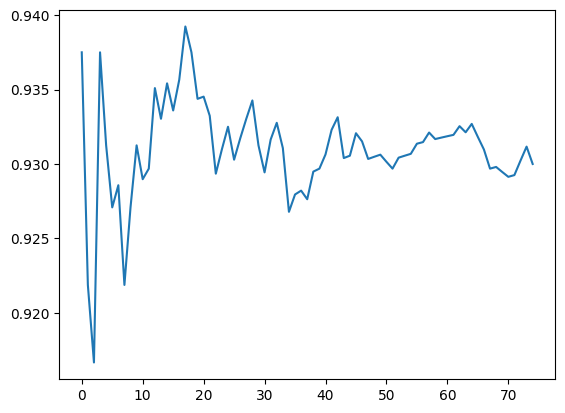

In [4]:
plt.plot(acc)

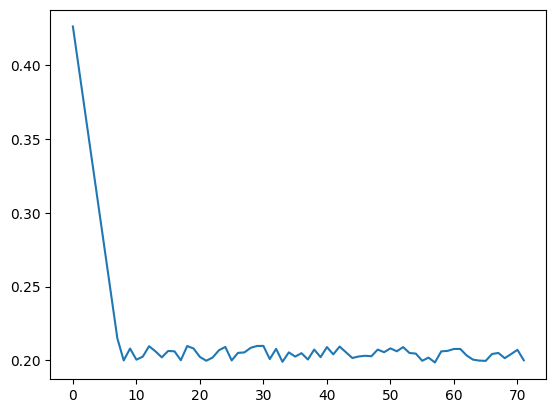

In [7]:
plt.plot(loss)

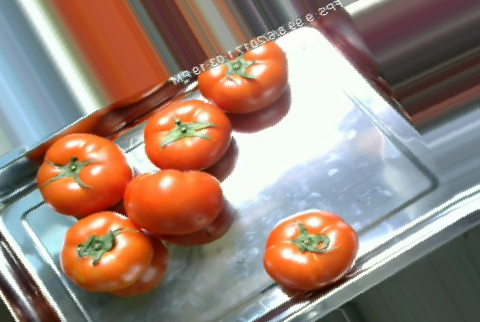

In [28]:
test_img = '/kaggle/input/datasat/Fruits_Vegetables_Dataset(12000)/Vegetables/FreshTomato/freshTomato (198).png'
IPython.display.Image(filename=test_img)

In [33]:
img, lab = CustomDataset(test_img, 'FreshTomato', transform=data_transform)
out = resnet(img)
print(out, lab)

freshTomato freshTomato
